In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

data=pd.read_csv('cleaned_dataset.csv')

In [0]:
data.head(3)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Org_Airport,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,Indianapolis International Airport,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,Indianapolis International Airport,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,Indianapolis International Airport,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO


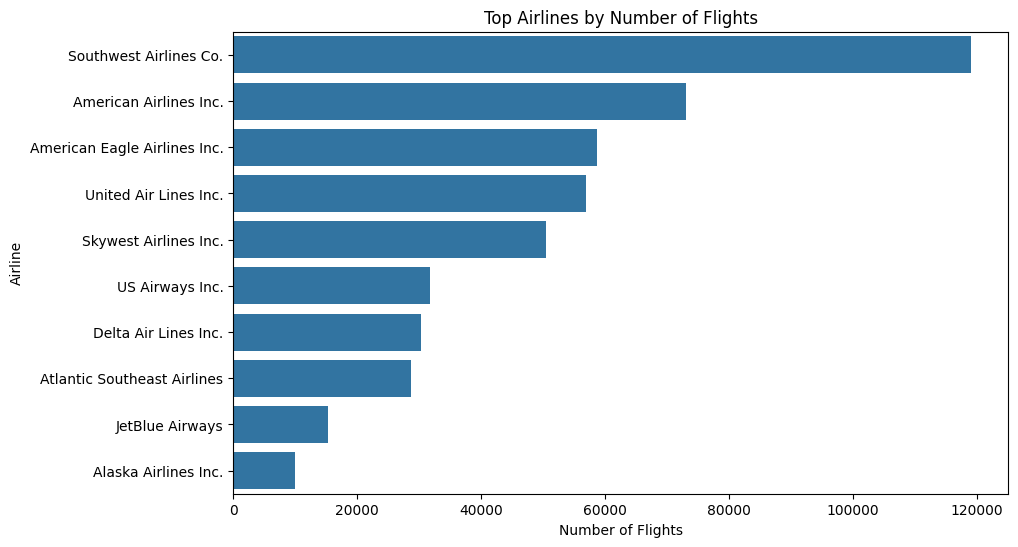

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Top airlines---
plt.figure(figsize=(10,6))
top_airlines = data['Airline'].value_counts().head(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index)
plt.title('Top Airlines by Number of Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

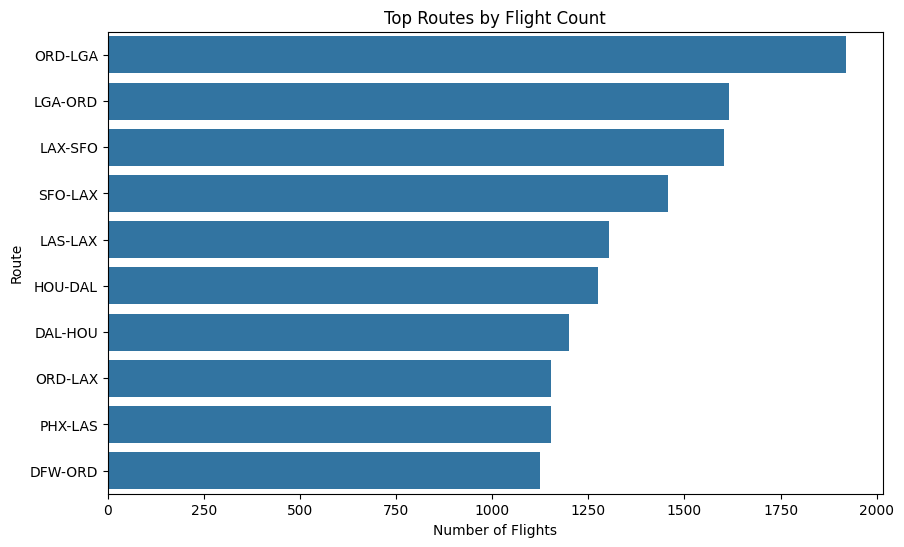

In [0]:
# Top Routes
plt.figure(figsize=(10,6))
top_routes = data['Route'].value_counts().head(10)
sns.barplot(x=top_routes.values, y=top_routes.index)
plt.title('Top Routes by Flight Count')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

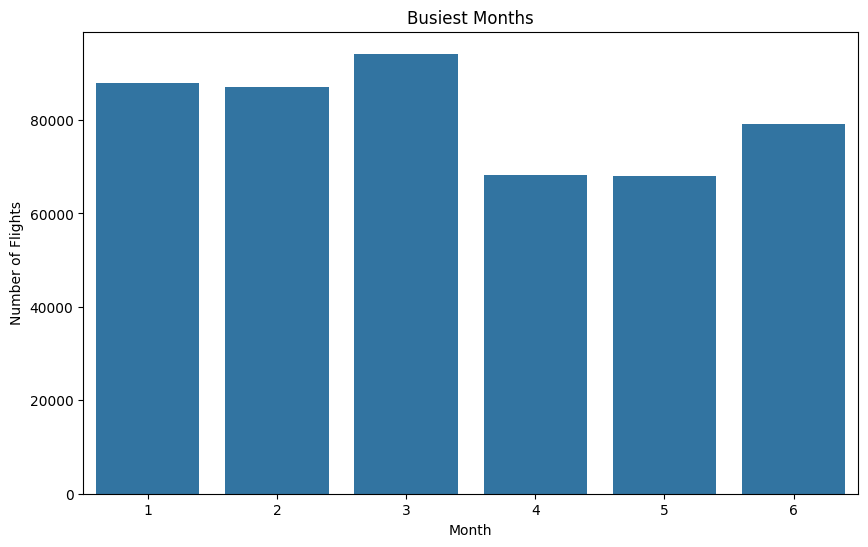

In [0]:
# Busiest Months
plt.figure(figsize=(10,6))
top_months = data['Month'].value_counts()
sns.barplot(x=top_months.index, y=top_months.values)
plt.title('Busiest Months')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

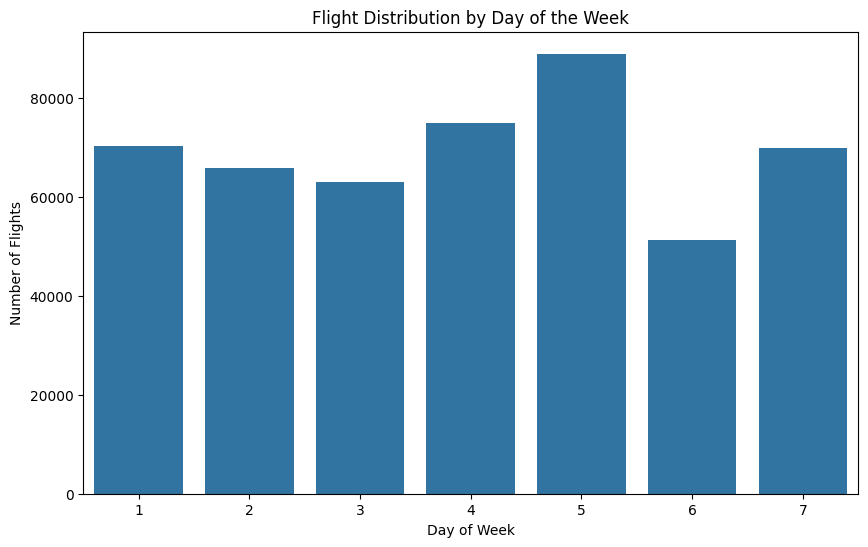

In [0]:
# --- Flight distribution by day of the week---
plt.figure(figsize=(10,6))
days=data['DayOfWeek'].value_counts()
sns.barplot(x=days.index,y=days.values)
plt.title('Flight Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.show()

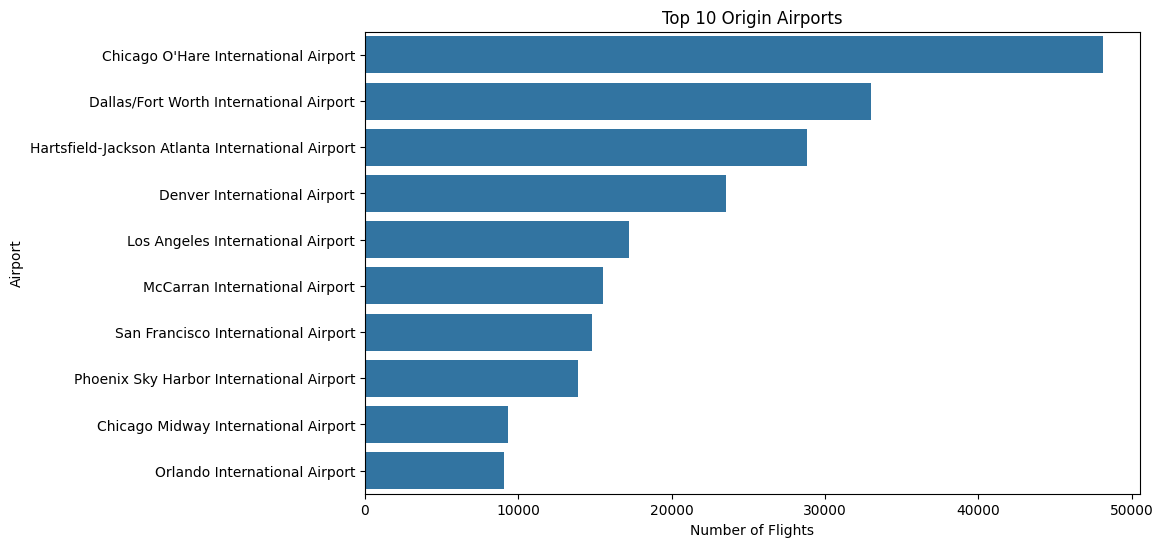

In [0]:
#by airport
plt.figure(figsize=(10,6))
top_airports = data['Org_Airport'].value_counts().head(10)
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title('Top 10 Origin Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Airport')
plt.show()

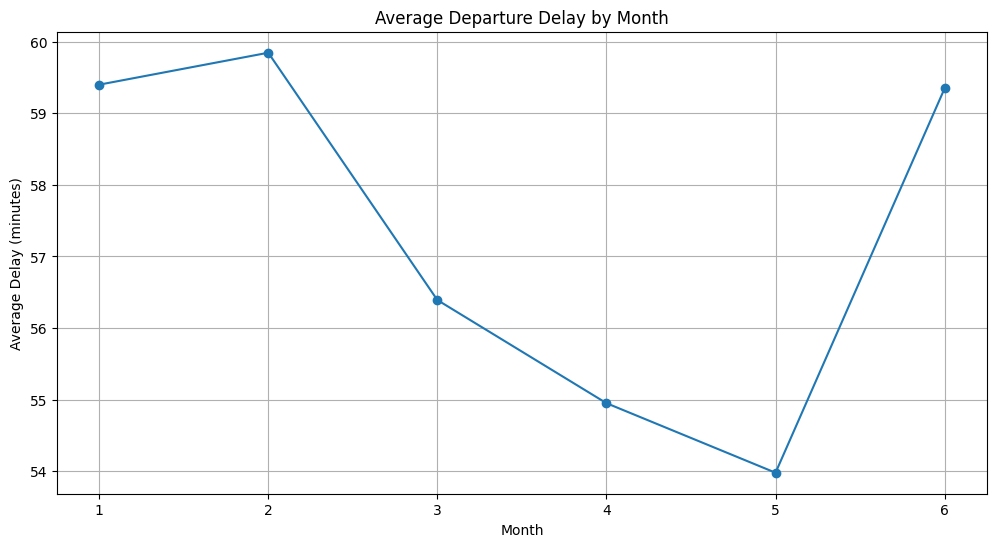

In [0]:
#line plot
plt.figure(figsize=(12,6))
avg_delay = data.groupby('Month')['DepDelay'].mean()
plt.plot(avg_delay.index, avg_delay.values, marker='o')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid()
plt.show()

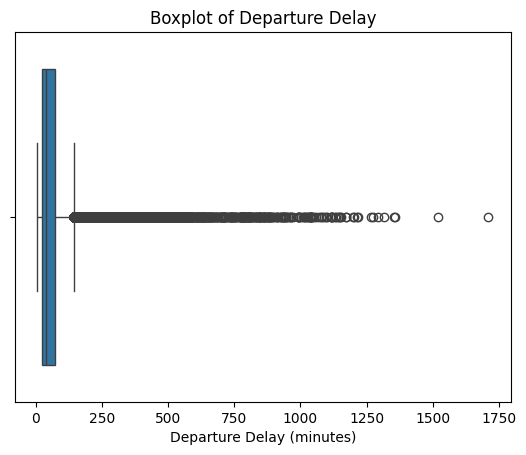

In [0]:
# Boxplot to detect outliers in delay
sns.boxplot(x=data['DepDelay'])
plt.title("Boxplot of Departure Delay")
plt.xlabel("Departure Delay (minutes)")
plt.show()

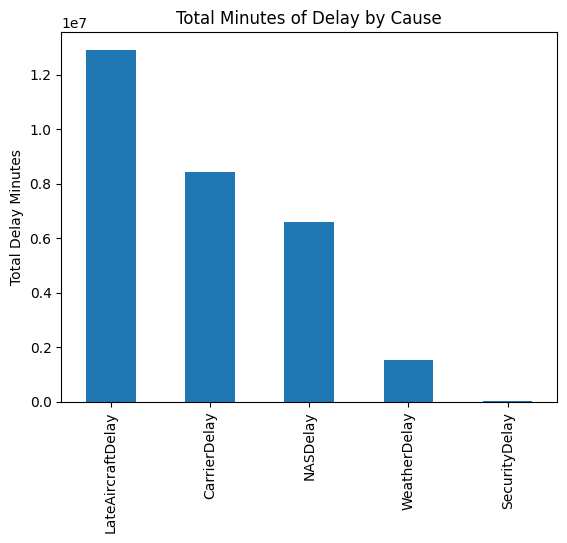

In [0]:
#  Distribution of Delay Causes
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data[delay_causes].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Minutes of Delay by Cause")
plt.ylabel("Total Delay Minutes")
plt.show()

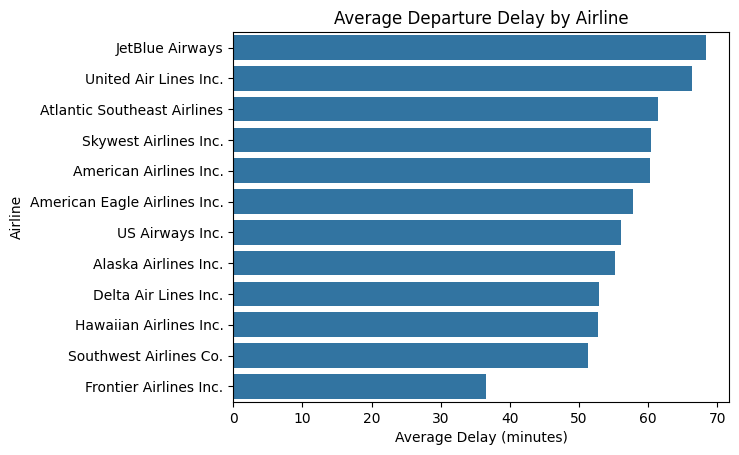

In [0]:
#Average Departure Delay by Airline
avg_delay_airline = data.groupby('Airline')['DepDelay'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_delay_airline, x='DepDelay', y='Airline')
plt.title("Average Departure Delay by Airline")
plt.xlabel("Average Delay (minutes)")
plt.show()

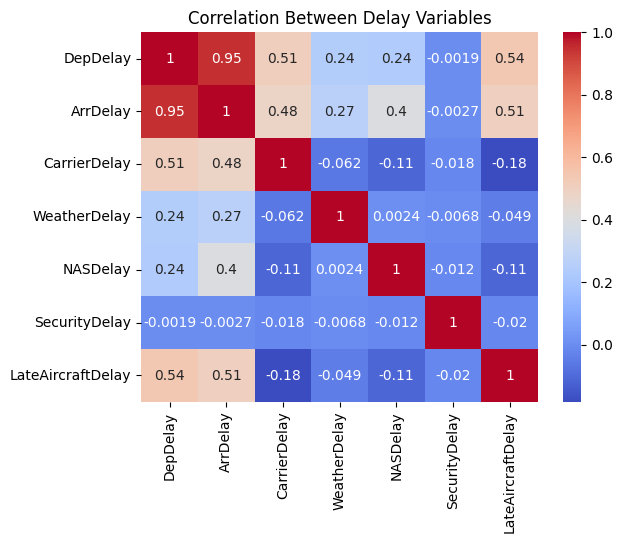

In [0]:
#  Correlation Heatmap for Delay Variables
delay_cols = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
sns.heatmap(data[delay_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Variables")
plt.show()

/home/spark-7a339476-4c09-4db5-8cd6-16/.ipykernel/2409/command-6054416585259449-981110890:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


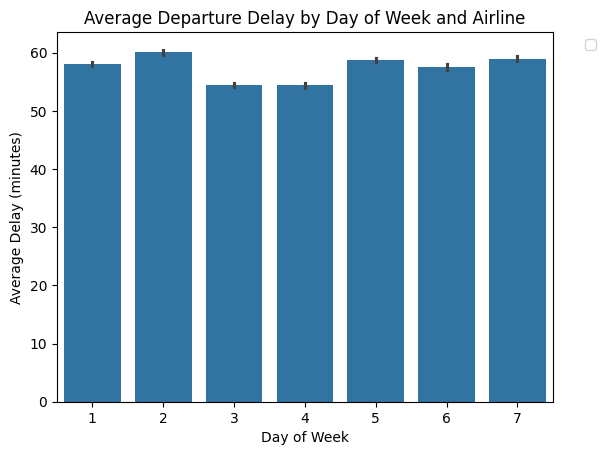

In [0]:
# Departure Delay by Day of Week and Airline
sns.barplot(
    data=data,
     x='DayOfWeek', y='DepDelay',estimator=np.mean
)
plt.title("Average Departure Delay by Day of Week and Airline")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


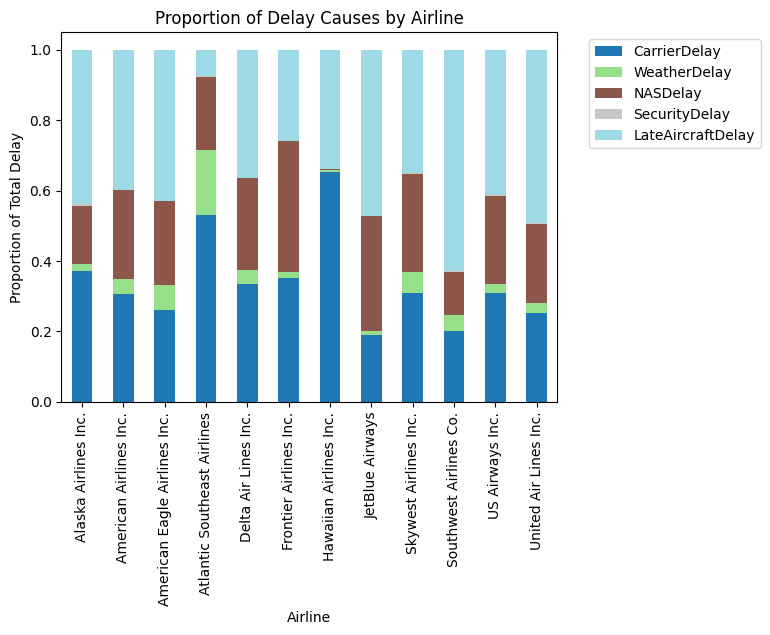

In [0]:
# Proportion of Delay Causes per Airline (Stacked Bar)
delay_causes = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
delay_share = data.groupby('Airline')[delay_causes].mean()
delay_share_norm = delay_share.div(delay_share.sum(axis=1), axis=0)
delay_share_norm.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("Proportion of Delay Causes by Airline")
plt.ylabel("Proportion of Total Delay")
plt.xlabel("Airline")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

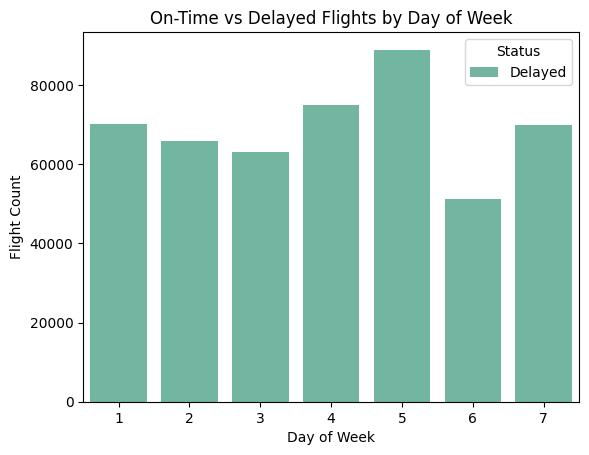

In [0]:
#  Flight Counts vs Delay Status by Day of Week
sns.countplot(data=data, x='DayOfWeek', hue='Delayed', palette='Set2')
plt.title("On-Time vs Delayed Flights by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Flight Count")
plt.legend(title="Status")
plt.show()
